In [9]:
base_url = 'https://www.mcgilldaily.com/category/sections/news/'
subpages = [base_url] + [base_url+'page/'+str(i)+'/' for i in range(2,199)]
subpages

['https://www.mcgilldaily.com/category/sections/news/',
 'https://www.mcgilldaily.com/category/sections/news/page/2/',
 'https://www.mcgilldaily.com/category/sections/news/page/3/',
 'https://www.mcgilldaily.com/category/sections/news/page/4/',
 'https://www.mcgilldaily.com/category/sections/news/page/5/',
 'https://www.mcgilldaily.com/category/sections/news/page/6/',
 'https://www.mcgilldaily.com/category/sections/news/page/7/',
 'https://www.mcgilldaily.com/category/sections/news/page/8/',
 'https://www.mcgilldaily.com/category/sections/news/page/9/',
 'https://www.mcgilldaily.com/category/sections/news/page/10/',
 'https://www.mcgilldaily.com/category/sections/news/page/11/',
 'https://www.mcgilldaily.com/category/sections/news/page/12/',
 'https://www.mcgilldaily.com/category/sections/news/page/13/',
 'https://www.mcgilldaily.com/category/sections/news/page/14/',
 'https://www.mcgilldaily.com/category/sections/news/page/15/',
 'https://www.mcgilldaily.com/category/sections/news/pag

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import os
import json

def get_article_links_and_dates(url):
    # Fetch the HTML content for the page
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    if os.path.exists('mcgill_article_pages.json'):
        # Open the JSON file for reading
        with open('mcgill_article_pages.json', 'r') as f:
            article_links = json.load(f)
    else:
        article_links = {}
    
    for article in soup.find_all('div', class_='article-content-col'):
        link = article.find('a')['href']
        date_str = article.find('time', class_='published').text
        date = datetime.strptime(date_str, '%B %d, %Y')
        year_month_day = date.strftime('%Y_%m_%d')
        if date in article_links:
            article_links[year_month_day].append(link)
        else:
            article_links[year_month_day] = [link]
        print(article_links[year_month_day])
    with open("mcgill_article_pages.json", "w") as outfile:
                json.dump(article_links, outfile, indent=4) 
    return article_links

In [13]:
for i, subpage in enumerate(subpages):
    print(f"Starting on subpage {i+1}.")
    get_article_links_and_dates(subpage)

Starting on subpage 1.
Starting on subpage 2.
Starting on subpage 3.
Starting on subpage 4.
Starting on subpage 5.
Starting on subpage 6.
Starting on subpage 7.
Starting on subpage 8.
Starting on subpage 9.
Starting on subpage 10.
Starting on subpage 11.
Starting on subpage 12.
Starting on subpage 13.
Starting on subpage 14.
Starting on subpage 15.
Starting on subpage 16.
Starting on subpage 17.
Starting on subpage 18.
Starting on subpage 19.
Starting on subpage 20.
Starting on subpage 21.
Starting on subpage 22.
Starting on subpage 23.
Starting on subpage 24.
Starting on subpage 25.
Starting on subpage 26.
Starting on subpage 27.


KeyboardInterrupt: 

In [4]:
from helpers.txt_to_text import get_article_text
from helpers.make_txt_entry import make_txt_entry
import os
import json 

# Open the JSON file
with open('mcgill_article_pages.json', 'r') as f:
    all_links_dates = json.load(f)

school_name = "McGill"
dates = sorted(all_links_dates.keys())

for date in reversed(dates):
    articles = all_links_dates[date]
    file_path = "journal_data/txt/"+school_name.replace(" ","_")+"/"+date+".txt"
    if(os.path.exists(file_path)):
        print(f"Date {date} already added.")
    else:
        article_text = ""
        for article in articles:
            article_text += get_article_text(article) + "\n"
            
        make_txt_entry(school_name="McGill", publication_date=date, text=article_text)
        print(f"Date {date} added.")

Date 2023_04_03 already added.
Date 2023_03_27 already added.
Date 2023_03_20 already added.
Date 2023_03_13 already added.
Date 2023_02_20 already added.
Date 2023_02_13 already added.
Date 2023_02_06 already added.
Date 2023_01_30 already added.
Date 2023_01_23 already added.
Date 2023_01_16 already added.
Date 2023_01_09 already added.
Date 2022_11_30 already added.
Date 2022_11_21 already added.
Date 2022_11_14 already added.
Date 2022_11_07 already added.
Date 2022_11_05 already added.
Date 2022_10_31 already added.
Date 2022_10_24 already added.
Date 2022_10_17 already added.
Date 2022_10_03 already added.
Date 2022_09_26 already added.
Date 2022_09_19 already added.
Date 2022_09_12 already added.
Date 2022_08_31 already added.
Date 2022_04_15 already added.
Date 2022_04_04 already added.
Date 2022_03_28 already added.
Date 2022_03_21 already added.
Date 2022_03_14 already added.
Date 2022_02_24 already added.
Date 2022_02_15 already added.
Date 2022_02_14 already added.
Date 202

KeyboardInterrupt: 

grouped_data/csv/McGill_Count.csv created.
grouped_data/pkl/yearly/McGill_Count.pkl being created.


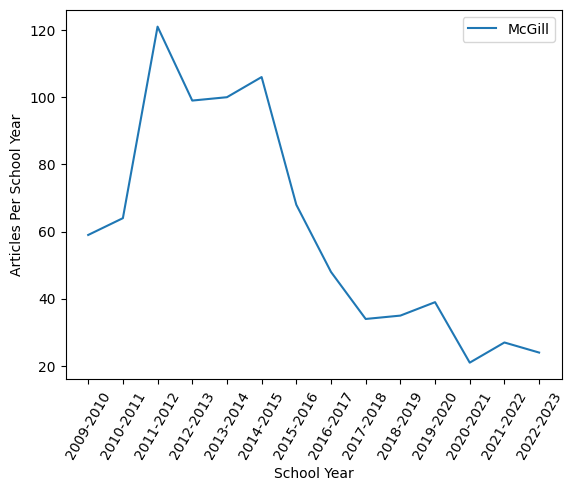

In [5]:
# Hyperparameters to Modify
school_name = 'McGill'
time_slice = 'yearly'

from helpers.graphers import grapher
from helpers.queries import one_query

school_names = [school_name]
save_pattern = '_'.join(school_names)+'_'+'Count'
grapher(school_names=school_names,
        pipeline=[],
        query=one_query,
        y_label=f"Articles Per School Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice=time_slice,
        img_path=f"figures/{school_name}/{save_pattern}_{time_slice}.png")


In [2]:
# Hyperparameters to Modify
school_name = 'McGill'
string = "China"
time_slice = 'monthly'

from helpers.graphers import grapher
from helpers.queries import count_query

school_names = [school_name]
save_pattern = '_'.join(school_names)+'_'+string.replace(' ','_')
grapher(school_names=school_names,
        pipeline=[],
        query=count_query(string),
        y_label=f"{string} Mentions Per Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice=time_slice,
        title=f"Mentions of {string}",
        img_path=f"figures/{school_name}/{save_pattern}_{time_slice}.png")

ModuleNotFoundError: No module named 'helpers.graphers'

grouped_data/csv/McGill_UCF_UCSD_UF_UMich_USC_York_Count.csv created.
grouped_data/pkl/yearly/McGill_UCF_UCSD_UF_UMich_USC_York_Count.pkl being created.


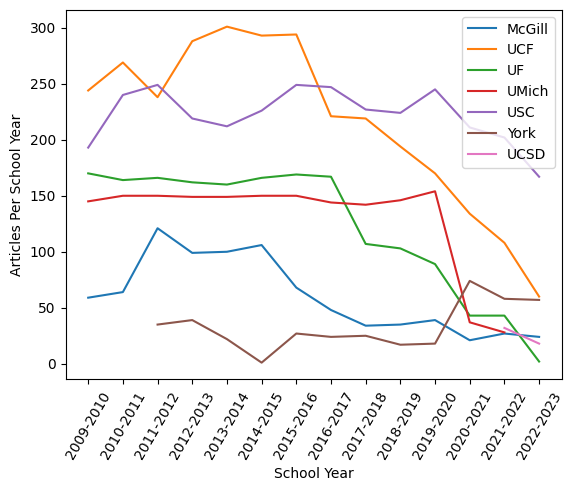

In [7]:
from helpers.graphers import grapher
from helpers.queries import one_query

import os

school_names = os.listdir('journal_data/txt')
save_pattern = '_'.join(school_names)+'_'+'Count'
grapher(school_names=school_names,
        pipeline=[],
        query=one_query,
        y_label=f"Articles Per School Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice='yearly')